#**INTRODUCTION**
##**Genetic Algorthm**

### **NỘI DUNG**
###1. Random Search
###2. Genetic Algorithm
###3. Bài Tập

### **1.Random Search**


Bài toán one-max

Giả thiết:
*   Cho vector v độ dài n chỉ chứa 0,1
*   **Hàm secret** cho biết vector chứa số phần tử 1
Hãy cho biết vector có chứa nhiều phần tử 1 nhất?

![](https://i.imgur.com/XHHqLk1.png)

Bài toán quá đơn giản đối với con người chúng ta vì rõ ràng vector chứa nhiều phần tử 1 nhất là vector mà các phần tử đều là số 1

![](https://i.imgur.com/JOUsFyF.png)

Tuy nhiên đứng ở góc nhìn là 1 cái máy tính thì input là giả thiết đã cho gồm vector chỉ chứa 0,1 và 1 hàm đánh giá. Làm sao tìm được vector đúng như yêu cầu bài toán?

Cách dummy nhất là ta sử dụng Random Search: 

1. Khởi tạo giá trị max = 0
2. Tạo 1 vector và random n giá trị của nó
3. Sử dụng hàm secret và ghi nhận giá trị max
4. Lặp lại một số lần cho đến khi kết thúc vòng lặp.

Ta có thể cải tiến, thay vì chỉ tạo 1 vector và random nó thì ta có thể tạo m vector rồi thực hiện tương tự

1. Khởi tạo giá trị max = 0
2. Tạo m vector và random giá trị từng vector
3. Sử dụng hàm secret cho toàn bộ m vector và ghi nhận giá trị max
4. Lặp lại một số lần cho đến khi kết thúc vòng lặp.

![](https://i.imgur.com/cDEuruN.png)
Thực tế kết quả quá tệ, tôi mong chờ nơi tình yêu bắt đầu ở vòng lặp thứ 1000 để được max = 10(giá trị mong muốn) nhưng tất cả các vector đại diện là mỗi chấm đã không như ý tôi muốn, thậm chí còn thua m vector ban đầu. Max của tôi nhận được chỉ là 8

Ở đây tôi cải tiến thuật toán random search bằng cách **tôi sử dụng m vector ban đầu và di truyền sang thế hệ m vector kế tiếp. Và mong chờ thế hệ tiếp theo sẽ tốt hơn.**

![](https://i.imgur.com/uvM2f91.png)


Và bằng ý tưởng di truyền của Darwin, người ta cho ra đời thuật toán **Genetic Algorithm**

### **2.Genetic Algorithm**

Quay trở lại với bài toán one-max và sơ đồ khối miêu tả cải tiến thuật toán Random search

![](https://i.imgur.com/uvM2f91.png)


Và đây là thuật toán Genetic Algorithm bằng cách thay thế phần di truyền bằng 3 bước: chọn lọc, lai ghép, đột biến

![](https://i.imgur.com/ldeCGtC.png)

### **3.BÀI TẬP**

#### **Class GA_algorithm**
sử dụng cho các bài toán, chúng ta chỉ cần viết lại hàm secret

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  9 12:02:44 2020

@author: Admin
"""
import numpy as np
import matplotlib.pyplot as plt

class GA_algorithm():
    '''
    return:
        class aims find parameter optimal for problem
    
    Parameter: 
        nGen is quantum parameter
        rangeOfGen is values parameter can get
        nIndividual is quantum individual
        nIterator: loop for optimal
        typeRandom: 1 is int and 0 is float
    '''
    def __init__(self, nGen, rangeOfGen, nIndividual, nIterator, typeRandom = 0, 
                 rateCross=0.9, rateMutate=0.05, elitism = 2):
        self.nGen = nGen
        self.rangeOfGen = rangeOfGen
        self.nIndividual = nIndividual
        self.nIterator = nIterator
        self.rateCross = rateCross
        self.rateMutate = rateMutate
        self.elitism = elitism
        self.nIterator = nIterator
        self.getOptimal = None
        self.losses = []
        self.typeRandom = typeRandom
    
    def getIndividual(self):
        if self.typeRandom:
            return np.random.randint(self.rangeOfGen[0],self.rangeOfGen[1]+1, self.nGen)
        return np.random.uniform(self.rangeOfGen[0],self.rangeOfGen[1], self.nGen)
    
    # Khởi tạo quần thể BỘ THAM SỐ
    def getPopulation(self):
        return np.array([self.getIndividual() for _ in range(self.nIndividual)])
    
    # Chọn 1 BỘ THAM SỐ
    def selectionIndiviual(self, population, funcCost):
        cost = funcCost(population)
        index = np.random.choice(np.arange(self.nIndividual), 
                                 self.nIndividual,
                                 p = cost/cost.sum())
        return population[index]

    # Chéo 2 BỘ THAM SỐ
    def crossIndividual(self, individual1, individual2):
        prob= np.random.random(size = self.nGen) < self.rateCross
        
        individual1[prob], individual2[prob] = individual2[prob], individual1[prob].copy()
        
        return individual1, individual2
    
    # Đột biến 1 BỘ THAM SỐ
    def mutateIndividual(self, individual):
        prob= np.random.random(size = self.nGen) < self.rateMutate
        individual[prob] = self.getIndividual()[prob]
        return individual
    
    # tối ưu BỘ THAM SỐ từ việc chạy lại nhiều lần
    def optimal(self, funcCost):
        population = self.getPopulation()
        for _ in range(self.nIterator):
            population = self.selectionIndiviual(population, funcCost)
            
            for i in range(self.nIndividual//2 - 2):
                
                in1 = population[np.random.randint(0,self.nIndividual)]
                in2 = population[np.random.randint(0,self.nIndividual)]
                
                in1,in2 = self.crossIndividual(in1.copy(),in2.copy())
                
                in1 = self.mutateIndividual(in1)
                in2 = self.mutateIndividual(in2)
                
                population[i*2] = in1
                population[i*2+1] = in2
            
            indexMax = funcCost(population).argsort()[-2:]
            population[-2] = population[indexMax[0]]
            population[-1] = population[indexMax[1]]
            self.losses.append(1/(funcCost(population).sum()+1))
        self.getOptimal = population[-1]
        
        return self.getOptimal
    #=========================================
    
    # Quan sát đồ thị
    def showGraphLosses(self):
        if (self.losses == []):
            print("you need run optimal Function!!")
            return
        
        plt.plot(self.losses)
        plt.show()

#### **Dataset**: [here](https://drive.google.com/drive/folders/1MKBhdffirxuUYKHG7ykYRGc4P5NviLsZ?usp=sharing)

#### **a) One-Max**

individual optimal =  [1 1 1 1 1 1 1 1 1 1]


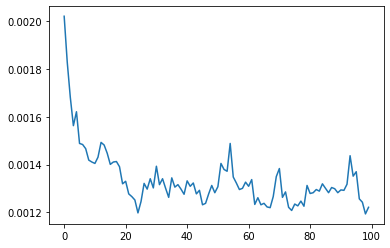

In [4]:
binaryMax = GA_algorithm(nGen = 10, rangeOfGen = (0,1), 
                           nIndividual=100, nIterator=100, typeRandom = 1)
print("individual optimal = ", binaryMax.optimal(lambda x : np.sum(x, axis=1)))
binaryMax.showGraphLosses()

#### **b) MinSphere**

individual optimal =  [0.15204692 0.35018357 0.29142909 0.33205738]


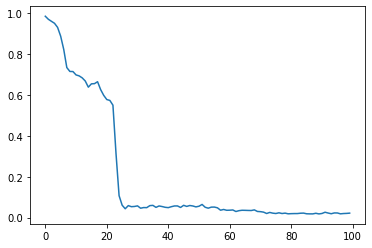

In [5]:

# Đánh giá loss, error của giá trị dự đoán so với giá trị thật (MIN)
def funcCall(population):
    fitness = np.sum(population*population, axis=1)
    
    return 1/(1 + fitness) # Đảo lại thành max để khớp với hàm sorted
#=========================================

minSphere = GA_algorithm(nGen = 4, rangeOfGen = (0,100), nIndividual=100, nIterator=100)
print("individual optimal = ", minSphere.optimal(funcCall))
minSphere.showGraphLosses()

#### **c) Knapsack**

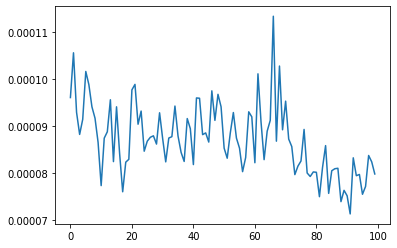

individual optimal =  [1 0 0 0 1 1 1 0 1 0 0 0]
97


In [6]:
weights = np.array([1, 2, 5, 7, 10, 12, 15, 23, 32, 33, 35, 37])  # can nang cac vat
prices =  np.array([1, 3, 6, 7, 12, 15, 25, 32, 44, 45, 47, 50])  # gia tri cua cac vat tuong ung
maxWeight = 70


def funcCost(population):
    weight = np.sum(population*weights, axis = 1)
    price = np.sum(population*prices, axis = 1)
    for i in range(len(population)):
        if weight[i] > maxWeight:
            price[i] = 1/100000 
                    
    return price

travelOpimal = GA_algorithm(12, (0,1), 200, 100, 1)
travelOpimal.optimal(funcCost)
travelOpimal.showGraphLosses()
print("individual optimal = ", travelOpimal.getOptimal)
print(np.sum(travelOpimal.getOptimal*prices))

#### **d) Travelling**

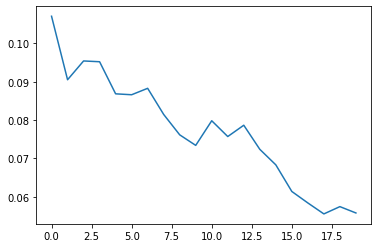

[3 4 5 1 2]
41.0


In [19]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
#đây là chuỗi ký tự chữ và số dài xuất hiện khi bạn nhấp vào "lấy liên kết để chia sẻ ảnh trong Google Drive"
drive = GoogleDrive(gauth)
#Lấy từng file được google chia sẻ theo  ID với đường Link được chuối số 
myfile = drive.CreateFile({'id': '1lnUUyVaAU_uORTj39cnaWVtu0gxis0fm'})
myfile.GetContentFile('data_route.txt')

data = np.genfromtxt('data_route.txt',delimiter=',')

def funcCall(population):
    cost = np.sum(data[population[:,0:-1] - 1,population[:,1:] - 1], axis=1)
    cost += data[population[:,-1] - 1,population[:,0] - 1]
    idx = [len(np.unique(i)) != len(i) for i in population]
    cost[idx] = 100000

    return 1/cost

travelOpimal = GA_algorithm(5, (1,5), 1000, 20, 1)
travelOpimal.optimal(funcCall)
travelOpimal.showGraphLosses()
a = travelOpimal.getOptimal
cost = np.sum(data[a[0:-1] - 1,a[1:] - 1])
cost += data[a[-1] - 1,a[0] - 1]
print(a)
print(cost)

#### **e) advertising**

individual optimal =  [0.02921223 0.22622665 0.16644947 0.48912364]


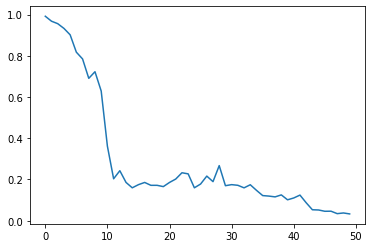

array([0.02921223, 0.22622665, 0.16644947, 0.48912364])

In [21]:
#Lấy từng file được google chia sẻ theo  ID với đường Link được chuối số 
myfile = drive.CreateFile({'id': '1Q-95xpVNZ0jKway2fzuwf6g1Gbg_cJzJ'})
myfile.GetContentFile('advertising.csv')

data = np.genfromtxt('advertising.csv',delimiter=',', skip_header=1)

features, yTruth = data[:, :-1], data[:, -1]
features = np.append(features, np.ones((len(data), 1)), axis=1)


def funcCall(population):
    fitness = np.zeros(population.shape[0])
    for i in range(population.shape[0]):
        y_predict = np.dot(features, population[i])
        fitness[i] = np.sum(y_predict - yTruth) ** 2

    return 1 / (1 + fitness)


advertising = GA_algorithm(nGen=4, rangeOfGen=(0, 1), nIndividual=50, nIterator=50)
print("individual optimal = ", advertising.optimal(funcCall))
advertising.showGraphLosses()
advertising.getOptimal